<a href="https://colab.research.google.com/github/Rohit-ChoudharyGit/Train_Fashion_MNIST_dataset/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#include tensorflow 
import tensorflow as tf

#include keras
from tensorflow import keras

# time to include helper libraries 
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.12.0


In [0]:
#import some data to train, here import the MNIST data , you can change the data set to train to your model
fashion_mnist =  keras.datasets.fashion_mnist
(train_images ,train_labels) ,(test_images, test_labels) = fashion_mnist.load_data()

In [13]:
#assign the class names to the labels 0 to 9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# get some knowledge about the train & test images
print(train_images.shape)

print(len(train_labels))
print(train_labels)

x = test_images.shape
y = len(test_labels)
z = test_labels
print(x,'\n',y,'\n',z)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28) 
 10000 
 [9 2 1 ... 8 1 5]


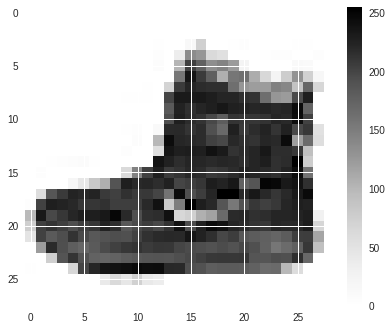

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

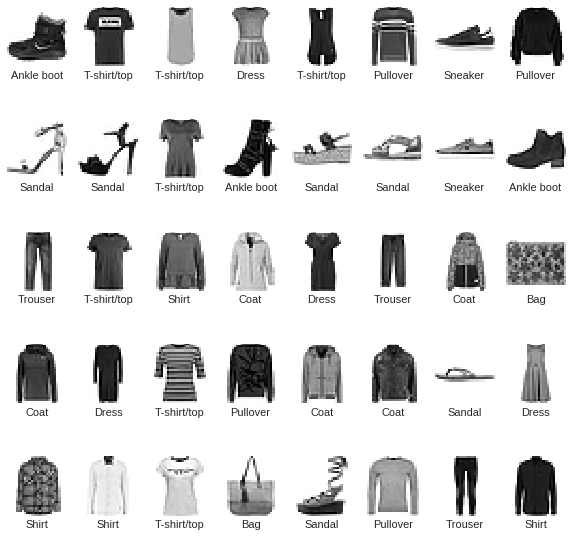

In [16]:
plt.figure(figsize = (10,10))
for i in range(40):
    plt.subplot(5,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.xlabel(class_names[train_labels[i]])
    plt.imshow(train_images[i] , cmap = plt.cm.binary)

In [0]:

model = keras.Sequential(
[ keras.layers.Flatten(input_shape = (28, 28)) , keras.layers.Dense(128, activation = tf.nn.relu),keras.layers.Dense(10, activation= tf.nn.softmax)]
)

model.compile( optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'] )

model.fit(train_images, train_labels, epochs = 10) #you can increase epochs for increasing the trainining efficiency



In [40]:
test_loss ,test_acc = model.evaluate(test_images, test_labels)
print('test Accuracy',test_acc) 

10000/10000 [==============================] - 1s 67us/step
test Accuracy 0.885


t turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of overfitting. 
**Overfitting** * is when a machine learning model performs worse on new data than on their training data.*

In [41]:
predictions = model.predict(test_images)
predictions[0]

array([2.4044993e-25, 4.6070613e-27, 2.8040296e-35, 3.5060908e-31,
       2.1127140e-26, 4.1758130e-07, 1.8072197e-16, 2.5053514e-06,
       1.5044746e-16, 9.9999702e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [43]:
test_labels[0]

9

In [0]:
# now let's plot the graph of the predicted image with probability label , color for distinguishing whether it's the right prediction or not.

def plot_image(i, predictions_array, true_label, img):                              #function for image plot
    # assign the values to the variables
    predictions_array, true_label, img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)                                                                   #no use of grid
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

  
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
 

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


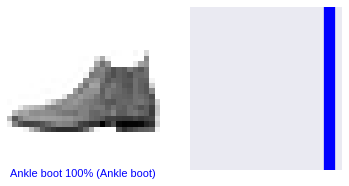

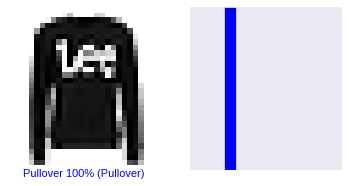

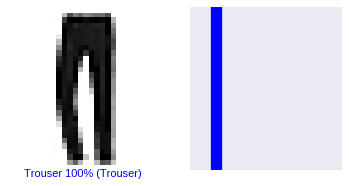

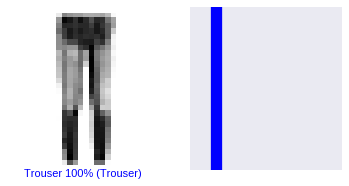

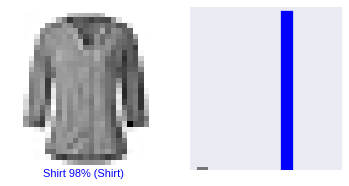

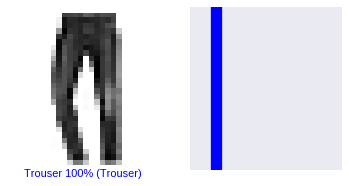

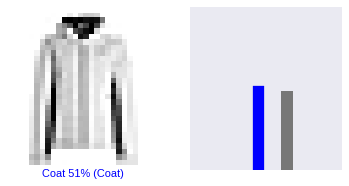

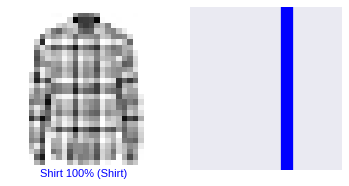

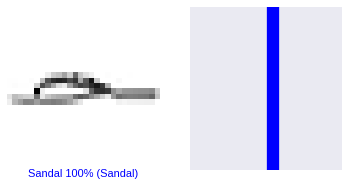

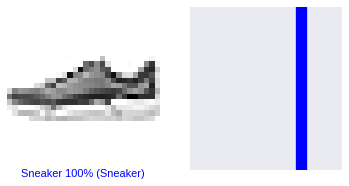

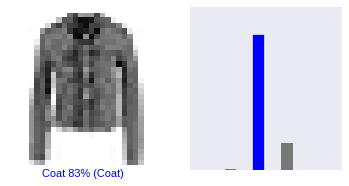

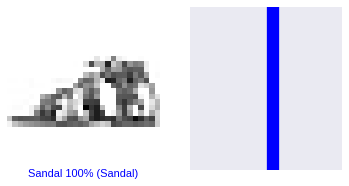

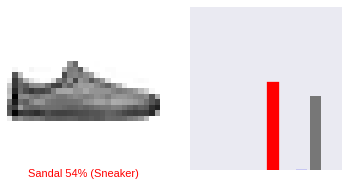

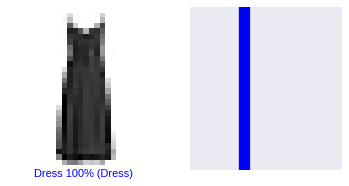

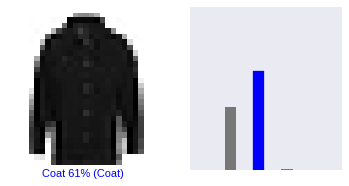

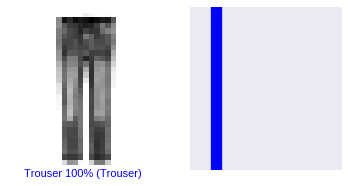

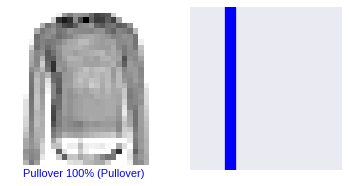

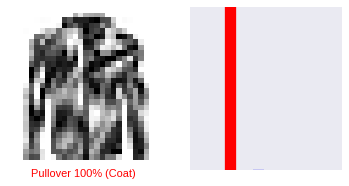

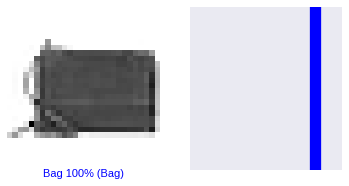

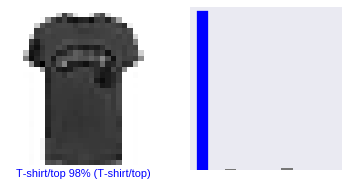

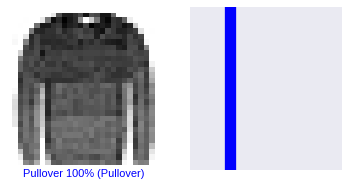

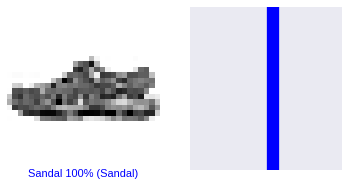

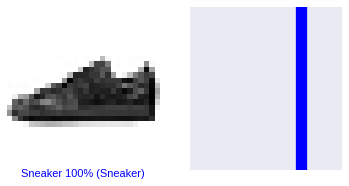

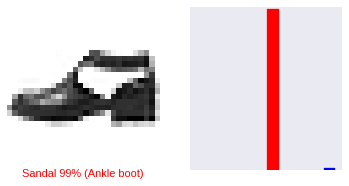

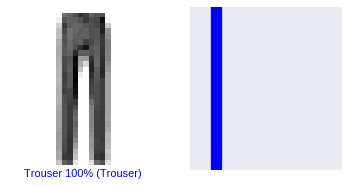

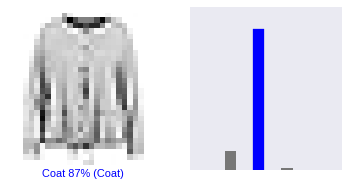

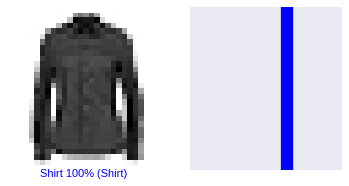

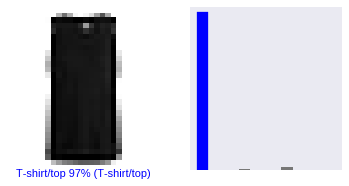

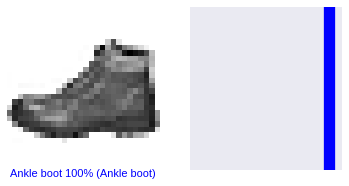

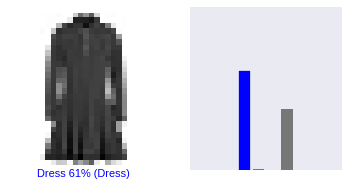

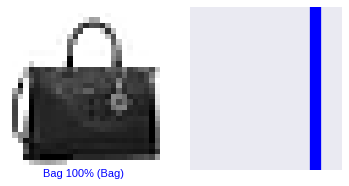

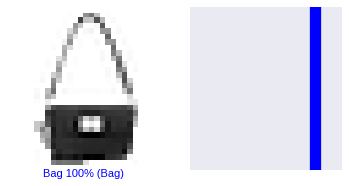

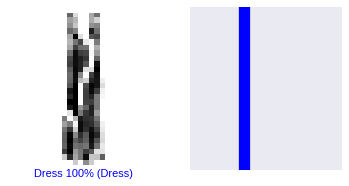

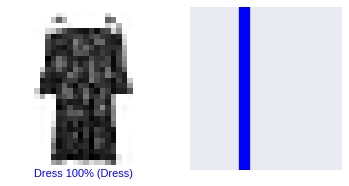

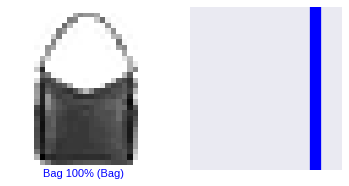

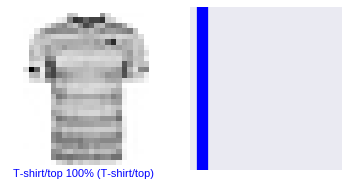

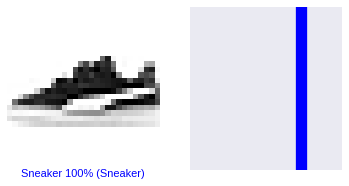

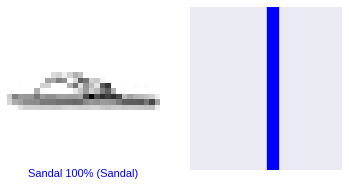

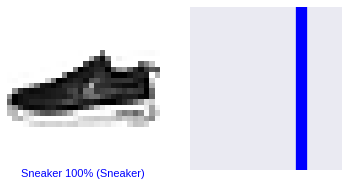

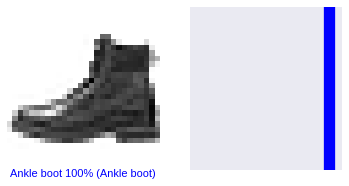

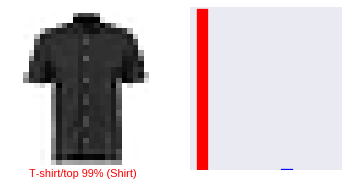

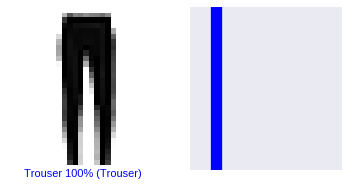

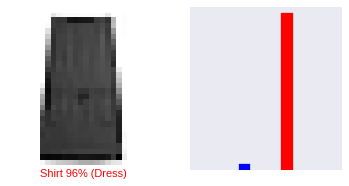

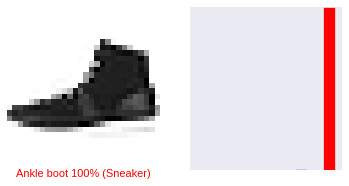

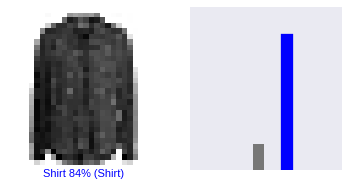

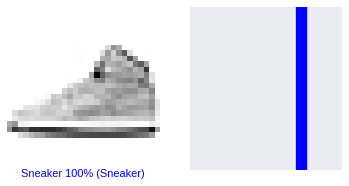

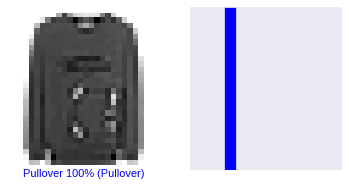

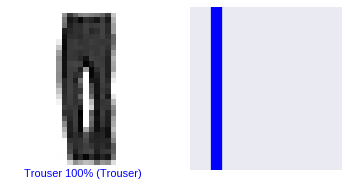

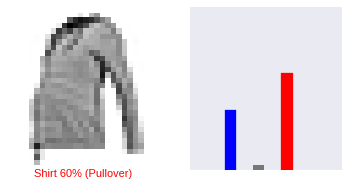

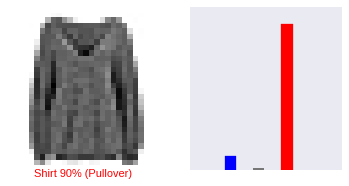

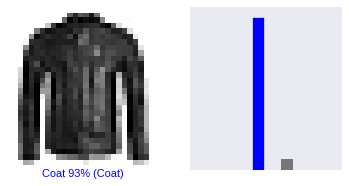

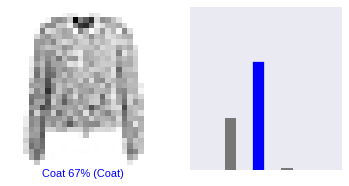

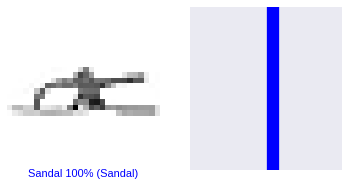

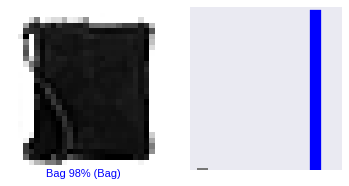

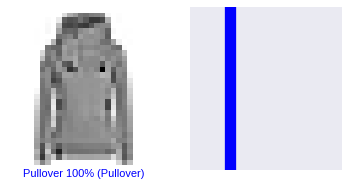

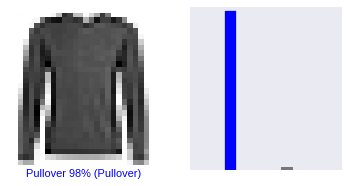

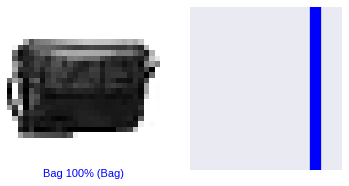

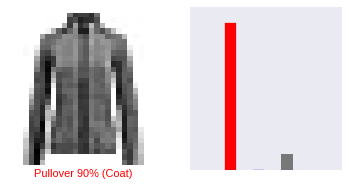

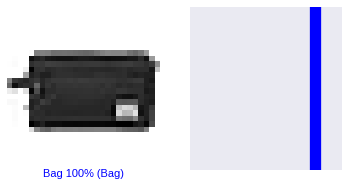

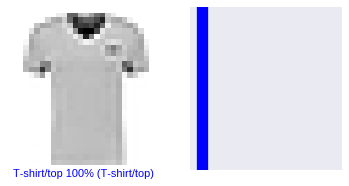

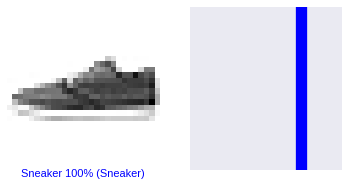

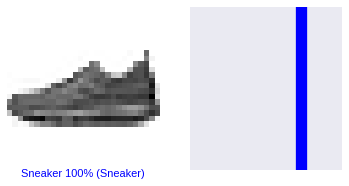

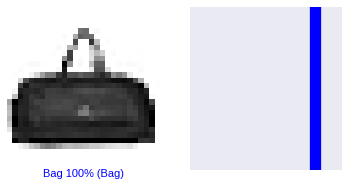

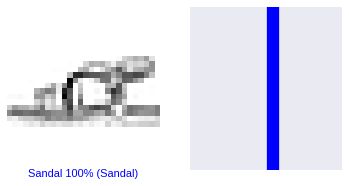

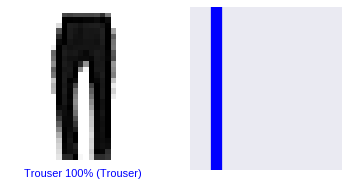

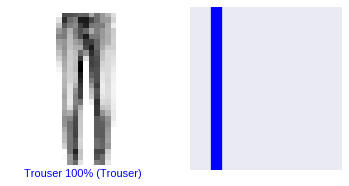

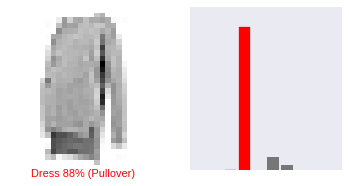

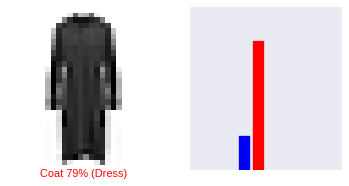

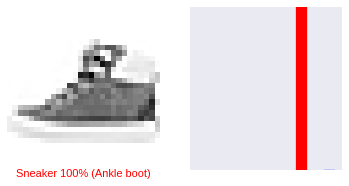

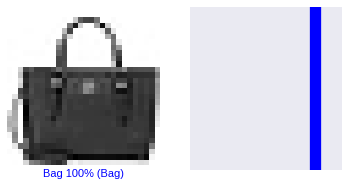

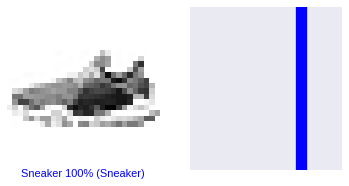

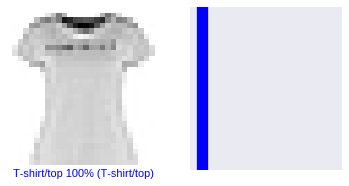

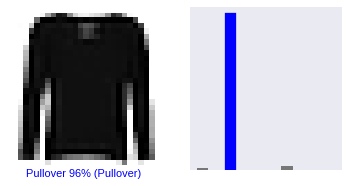

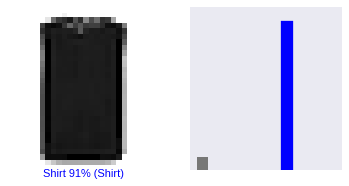

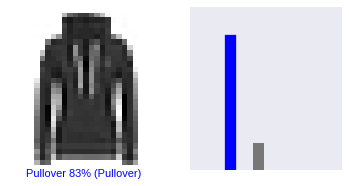

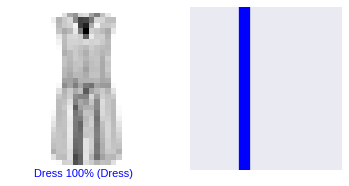

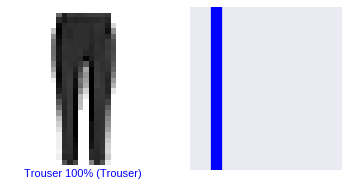

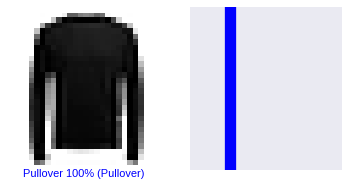

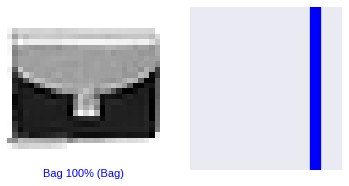

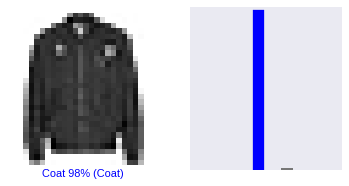

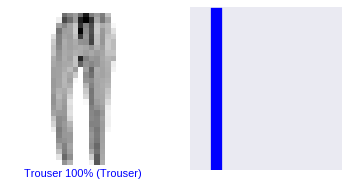

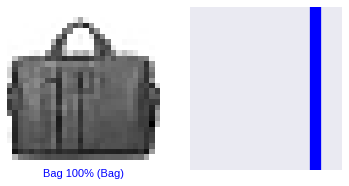

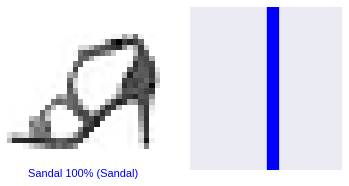

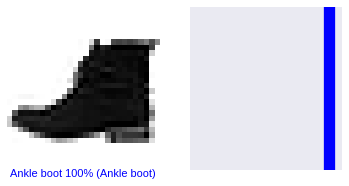

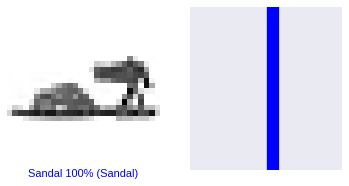

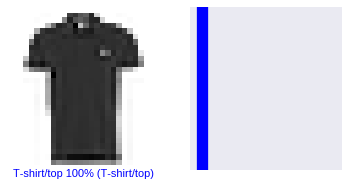

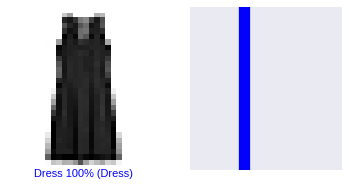

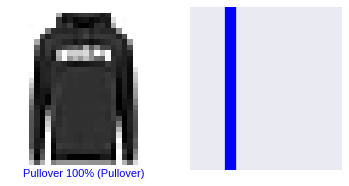

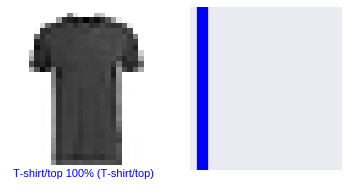

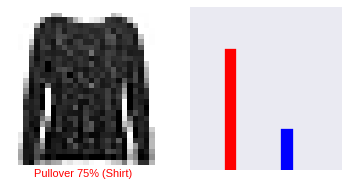

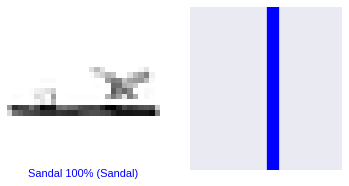

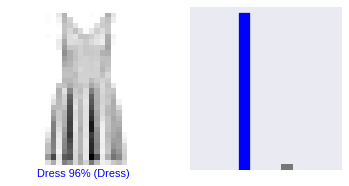

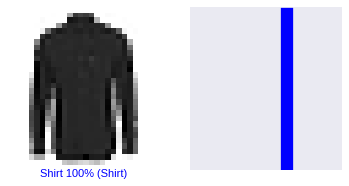

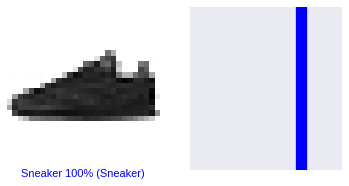

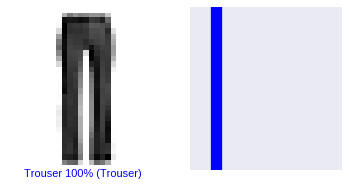

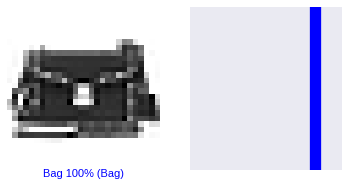

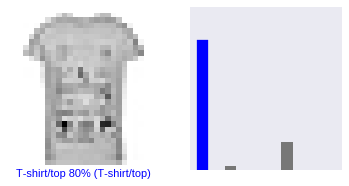

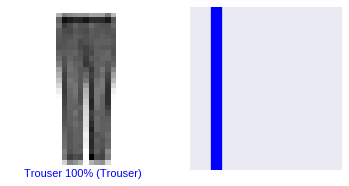

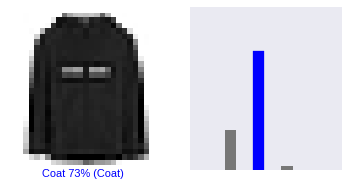

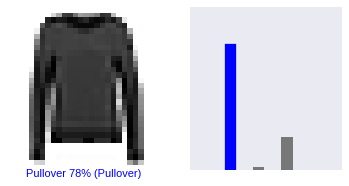

In [87]:
# let's see the output for 100 images. you can increase as you like .
for i in range(100):  # range(100) = 0 to 100
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i,predictions,test_labels,test_images)
  plt.subplot(1,2,2)
  plot_value_array(i,predictions, test_labels)

In [91]:
# now let's make prediction for a single image
img = test_images[0]
print(img.shape)

#models are optimized to make predictions on a batch, or collection, 
#of examples at once. So even though we're using a single image, we need to add
#it to a list:

img = (np.expand_dims(img ,0))
print(img.shape)
predictions_single = model.predict(img)
print(predictions_single)
print(np.argmax(predictions_single))



(28, 28)
(1, 28, 28)
[[2.4044993e-25 4.6071141e-27 2.8040511e-35 3.5060640e-31 2.1127059e-26
  4.1757571e-07 1.8072266e-16 2.5053394e-06 1.5044574e-16 9.9999702e-01]]
9


([<matplotlib.axis.XTick at 0x7fd275daeba8>,
 <a list of 10 Text xticklabel objects>)

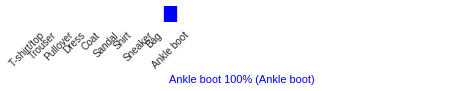

In [93]:
plot_image(0,predictions_single,test_labels,img)
plot_value_array(0, predictions_single, test_labels)

plt.xticks(range(10), class_names, rotation=45)